## Week5 Lab2 WorkSheet: Random Forest


**This lab**: the aim of this lab is to recap/learn:
- the core concepts of decision trees
- the core concepts of bagging
- the core concepts of random forests

For further information on the random forest method in sklearn used in this part, refer to: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


### Install dependencies

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Generate and plot a dataset

First generate and plot a two-dimensional dataset using `make_blobs` function in **sklearn**, with four classes of data points and plot it with different classes in different colours. 

Note that both `make_blobs` and make_classification create multiclass datasets by allocating each class one or more normally-distributed clusters of points. For more information on generating datasets using **sklearn** functions, refer to: https://scikit-learn.org/stable/datasets/sample_generators.html

(array([-1.52392631,  7.12573205]), array([-1.83601846,  2.6844156 ]))

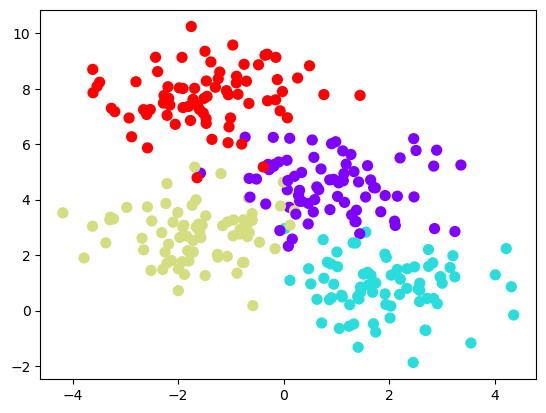

In [3]:
# generate a dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0) # n_features has a default value of 2

# change the values of the parameters in make_blobs and see what happens

# plot the dataset
# marker has a default value of 'o', as many colours as class labels and a size of 50
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

# use marker='^' by uncommenting the following:
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, marker='^', cmap='rainbow');
X[1], X[10]


### Create and visualise a decision tree classifier

Fit a simple decision tree classifier to this dataset, which will iteratively split the data along one or the other **axis** using a cut-off value as a quantitative criterion, and at each level assign the label of the new region according to a majority vote of data points within it. 

### Define a function for visualising the output of a classifier

Define a new function named `visualize_classifier(model, X, y, ax=None, cmap='rainbow')`, which will take as input a model, X, y, a colour map, fits the model to the dataset, and draw the decision boundary. 

**Once defined, this is a very useful function that can be used for visualising the output of a classifier.**

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Get the current Axes instance on the current figure matching the given keyword args, or create one.
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)



### Decision Trees: Visualise the output of a decision tree to its maximum depth

Take the decision tree as the classifier (e.g., the model) and apply it to the data set created above, and use the `visualize_classifier(model, X, y, ax=None, cmap='rainbow')` function defined above to visualise a decision tree with no depth being specified explicitly. Observe the display.

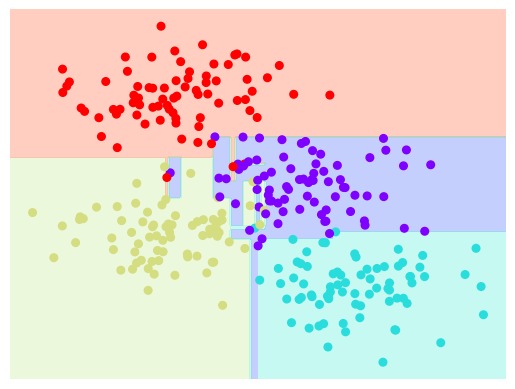

In [5]:
from sklearn.tree import DecisionTreeClassifier # import the decision tree classifier

visualize_classifier(DecisionTreeClassifier(), X, y)


### Visualise the output of a decision tree to different depths

Now, visualize each tree by a decision tree classifier fitted on this dataset to each of the first four depths, e.g., depth = 1, 2, 3, 4 respectively.

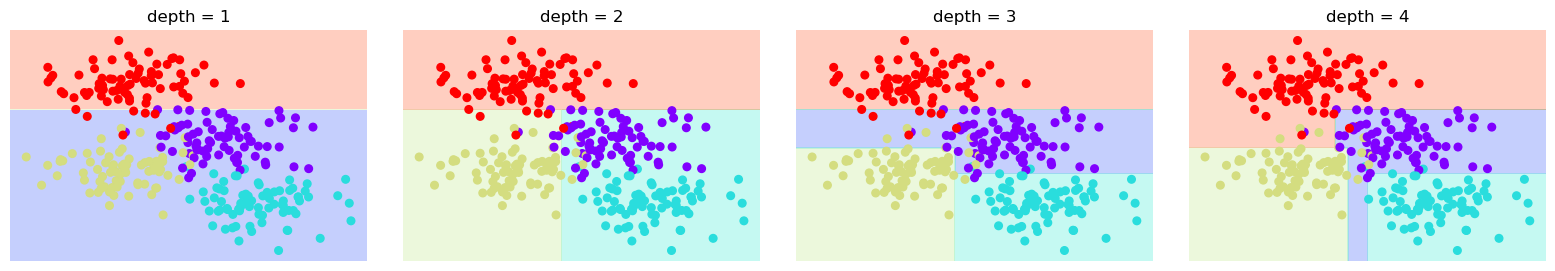

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3)) # create a figure with 4 axes
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth) # the depth of a decision tree can be given
    visualize_classifier(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('decision-tree-levels.png')


### View the decisiosn tree as a TREE as in Week3 Lab2

Use the tree.plot.tree commend as that in Weeks Lab2 and visualize a tree of the depth of your choice (e.g., 2,3 4) and compare the TREE visualization with the scatter plot visualization above.

In [7]:
# your code here



### Ensembles of  Decison Tree classifiers via Bagging

Use the function `BaggingClassifier(model, n_estimators=??, max_samples=0.8, random_state=1)` to an ensemble of the decision trees. Note `n_estimators` is a hyperparameter which specifies how many individual classifiers shall be included in this ensemble. 

Observe and compare the output from this ensemble and that from the previous (no-depth limit) decision tree. 

In [8]:

# your code here


## Random Forests

Use the `RandomForestClassifier()` class in **Scikit-Learn** to generate a Random Forest classifier. Observe and compare this output with any of the previous outputs that are relevant. 

In [9]:

# your code here


## Hyperparameter Tuning in bagging classifiers and random forest classifiers

There are parameters in these classifiers that need to be tuned. When creating bagging classifiers the main parameters are `n_estimators` and `max_samples`. When creating random forests the main parameters are `n_estimators`, `max_features` and `max_samples`. 

You can experiment on varying these parameters and observe the outcomes of different classifiers. 

In [10]:
# your code here


##  A Random Forest for Classifying Digits

### Load a toy dataset

Load the **digits** toy dataset from sklearn. scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.


In [11]:
# your code here


### Visualize the first few data points

In [12]:
# your code here


### Classify the digits using a random forest

You can use function `cross_val_score()` to show a performance metrics. 

**You can select a different number of estimators and a different number of iterations in cross validation.**

In [13]:

# your code here


### Use different performance metrics

Calculate and print out a different performance measure instead of cross_val_score
